# Data Analysis Customer Segmentation Project: Customer Demographic

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [171]:
cust_demo = pd.read_excel('/Users/abhaykatti/Downloads/Raw_data.xlsx', sheet_name = 'CustomerDemographic')

In [172]:
cust_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [173]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

# Overview of the data

In [174]:
print("Total records (rows) in the dataset : {}".format(cust_demo.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_demo.shape[1]))

Total records (rows) in the dataset : 4000
Total columns (features) in the dataset : 13


In [175]:
#We are selecting the numeric columns

df_numeric = cust_demo.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))

#Selecting the non-numeric columns
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))


The numeric columns are : ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']
The non-numeric columns are : ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


# Data Cleaning and quality assessment

# 1: Drop irrelevant columns

In [176]:
cust_demo.drop(labels={'default'}, axis=1 , inplace=True)

# 2: Check for missing values

In [177]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [178]:
cust_demo.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [179]:
# We can observe that job_title and job_industry_category have the highest missing values
# followed by last_name, tenure and DOB columns

# 2.1: Check for Last Name null values

In [180]:
cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

In [181]:
cust_demo[cust_demo['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14 00:00:00,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03 00:00:00,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28 00:00:00,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27 00:00:00,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17 00:00:00,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17 00:00:00,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07 00:00:00,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06 00:00:00,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [182]:
# 125 people have no last name.
# Since it is less than 5% of the total data, we can remove the records.

In [183]:
dob_index_drop = cust_demo[cust_demo['DOB'].isnull()].index
dob_index_drop

#Not showing the missing values due to some corrections done later on, values are removed as shown below

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [184]:
cust_demo.drop(index=dob_index_drop, inplace=True, axis=0)

In [185]:
cust_demo['DOB'].isnull().sum()

0

In [186]:
dob_index_drop_2 = cust_demo[cust_demo['last_name'].isnull()].index
dob_index_drop_2

Index([   3,   66,  105,  138,  196,  210,  249,  250,  256,  274,
       ...
       3623, 3634, 3650, 3755, 3816, 3884, 3915, 3926, 3961, 3998],
      dtype='int64', length=121)

In [187]:
cust_demo.drop(index=dob_index_drop_2, inplace=True, axis=0)

In [188]:
cust_demo['last_name'].isnull().sum()

0

In [189]:
# No missing values for DOB.

# Let's create an Age column to check for outliers

In [190]:
def age(born):
  if isinstance(born, str):
    born = datetime.strptime(born, '%Y-%m-%d').date()
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
cust_demo['Age'] = cust_demo['DOB'].apply(age)

/Users/abhaykatti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

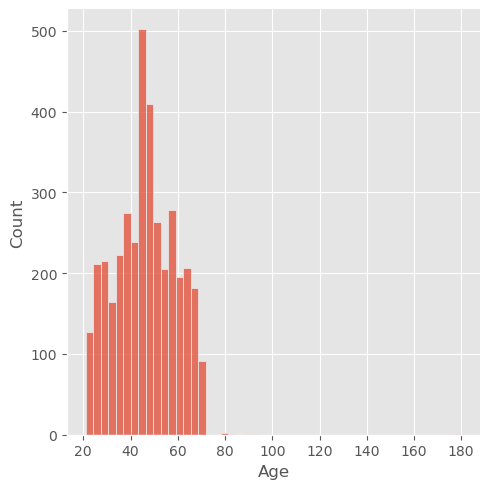

In [191]:
plt.figure(figsize=(20,8))
sns.displot(cust_demo['Age'], kde=False, bins=50)

In [192]:
cust_demo['Age'].describe()

count    3792.000000
mean       46.199367
std        12.789835
min        21.000000
25%        37.000000
50%        46.000000
75%        56.000000
max       180.000000
Name: Age, dtype: float64

In [193]:
# Age 180 is definitely an outlier so we need to remove it.

In [194]:
cust_demo[cust_demo['Age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,180


In [195]:
age_index_drop = cust_demo[cust_demo['Age']>100].index
cust_demo.drop(index=age_index_drop, inplace=True , axis=0)

# 2.3: Tenure

In [196]:
# When DOB is null, tenure also should be null.

In [197]:
cust_demo['tenure'].isnull().sum()

0

# 2.4: Job Title

In [198]:
cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,Yes,13.0,57
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,Yes,11.0,48
10,11,Uriah,Bisatt,Male,99,1954-04-30 00:00:00,NaN,Property,Mass Customer,N,No,9.0,69
21,22,Deeanne,Durtnell,Female,79,1962-12-10 00:00:00,NaN,IT,Mass Customer,N,No,11.0,61
22,23,Olav,Polak,Male,43,1995-02-10 00:00:00,NaN,NaN,High Net Worth,N,Yes,1.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,3960,Hobart,Burgan,Male,6,2000-03-16 00:00:00,NaN,Property,Mass Customer,N,No,1.0,23
3967,3968,Alexandra,Kroch,Female,99,1977-12-22 00:00:00,NaN,Property,High Net Worth,N,No,22.0,46
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28 00:00:00,NaN,Retail,Mass Customer,N,No,8.0,44
3978,3979,Kleon,Adam,Male,67,1974-07-13 00:00:00,NaN,Financial Services,Mass Customer,N,Yes,18.0,49


In [199]:
# Since there are quite a few missing titles, we will replace null values with Missing.

In [200]:
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)

In [201]:
cust_demo['job_title'].isnull().sum()

0

# 2.5: Job Industry category

In [202]:
cust_demo[cust_demo['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,No,7.0,61
15,16,Harlin,Parr,Male,38,1977-02-27 00:00:00,Media Manager IV,NaN,Mass Customer,N,Yes,18.0,47
16,17,Heath,Faraday,Male,57,1962-03-19 00:00:00,Sales Associate,NaN,Affluent Customer,N,Yes,15.0,61
17,18,Marjie,Neasham,Female,79,1967-07-06 00:00:00,Professor,NaN,Affluent Customer,N,No,11.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15 00:00:00,Geologist I,NaN,Mass Customer,N,Yes,11.0,55
3973,3974,Misha,Ranklin,Female,82,1961-02-11 00:00:00,Technical Writer,NaN,Affluent Customer,N,Yes,9.0,63
3975,3976,Gretel,Chrystal,Female,0,1957-11-20 00:00:00,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0,66
3982,3983,Jarred,Lyste,Male,19,1965-04-21 00:00:00,Graphic Designer,NaN,Mass Customer,N,Yes,9.0,58


In [203]:
# Again, quite a few null values, will be replaced by Missing

In [204]:
cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [205]:
cust_demo['job_industry_category'].isnull().sum()

0

In [206]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [207]:
# No more null values 

In [208]:
print("Total records after removing Missing Values: {}".format(cust_demo.shape[0]))

Total records after removing Missing Values: 3791


# 3: Checking for inconsistency in Data

# 3.1: Gender

In [209]:
cust_demo['gender'].value_counts()

gender
Female    1980
Male      1808
F            1
Femal        1
M            1
Name: count, dtype: int64

In [210]:
def replace_gender_names(gender):
    
    # Making Gender as Male and Female as standards
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)

In [211]:
cust_demo['gender'].value_counts()

gender
Female    1982
Male      1809
Name: count, dtype: int64

In [ ]:
# Uniformity in gender column is now maintained.

# 3.2: Wealth Segment

In [212]:
cust_demo['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1901
High Net Worth        955
Affluent Customer     935
Name: count, dtype: int64

# 3.3: Deceased Indicator

In [213]:
cust_demo['deceased_indicator'].value_counts()

deceased_indicator
N    3789
Y       2
Name: count, dtype: int64

# 3.4: Owns a car

In [214]:
cust_demo['owns_car'].value_counts()

owns_car
Yes    1917
No     1874
Name: count, dtype: int64

# 4: Check for Duplicates

In [215]:
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()
print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_demo.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3791
Number of records in original dataset : 3791


In [ ]:
# No duplicates in the dataset

# 5: Export cleaned dataset to CSV

In [216]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)